Loading and inspecting your merged dataset in a notebook

In [2]:
import pandas as pd

# Load the merged features CSV
df = pd.read_csv('merged_features.csv')

# Show the shape and first few rows
df.shape, df.head()

((106, 59),
        mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
 0 -290.891022  103.323196  31.521793  18.506334   8.285328 -11.996548   
 1 -298.124878   92.796242  11.258208  10.074308 -14.415175   2.253958   
 2 -290.150909  122.682289   6.487182  22.660751   6.432351  -4.673965   
 3 -199.215439  106.744370  -7.775826  19.734545  -4.810340   0.715076   
 4 -471.459930  133.304123  37.536320  25.147472   9.098192   6.168714   
 
       mfcc_7    mfcc_8    mfcc_9   mfcc_10  ...  avg_pause_duration  \
 0 -14.400554  2.999785 -7.950426  1.604990  ...            0.211765   
 1 -15.372137 -5.864001 -8.123696 -0.934609  ...            0.248276   
 2 -10.450406 -2.382061 -7.630840  1.725994  ...            0.198750   
 3 -14.807957 -7.878012 -6.074315 -6.830226  ...            0.312000   
 4  -0.547621  0.443585 -1.474732  1.742596  ...            0.332449   
 
    max_pause_duration  stammer_count  repeated_words  forgetfulness  \
 0                1.56              

In [4]:
# Check for missing values
df.isnull().sum()


mfcc_1                 0
mfcc_2                 0
mfcc_3                 0
mfcc_4                 0
mfcc_5                 0
mfcc_6                 0
mfcc_7                 0
mfcc_8                 0
mfcc_9                 0
mfcc_10                0
mfcc_11                0
mfcc_12                0
mfcc_13                0
delta_mfcc_1           0
delta_mfcc_2           0
delta_mfcc_3           0
delta_mfcc_4           0
delta_mfcc_5           0
delta_mfcc_6           0
delta_mfcc_7           0
delta_mfcc_8           0
delta_mfcc_9           0
delta_mfcc_10          0
delta_mfcc_11          0
delta_mfcc_12          0
delta_mfcc_13          0
chroma_1               0
chroma_2               0
chroma_3               0
chroma_4               0
chroma_5               0
chroma_6               0
chroma_7               0
chroma_8               0
chroma_9               0
chroma_10              0
chroma_11              0
chroma_12              0
contrast_1             0
contrast_2             0


In [5]:
# Check data types
df.dtypes

mfcc_1                 float64
mfcc_2                 float64
mfcc_3                 float64
mfcc_4                 float64
mfcc_5                 float64
mfcc_6                 float64
mfcc_7                 float64
mfcc_8                 float64
mfcc_9                 float64
mfcc_10                float64
mfcc_11                float64
mfcc_12                float64
mfcc_13                float64
delta_mfcc_1           float64
delta_mfcc_2           float64
delta_mfcc_3           float64
delta_mfcc_4           float64
delta_mfcc_5           float64
delta_mfcc_6           float64
delta_mfcc_7           float64
delta_mfcc_8           float64
delta_mfcc_9           float64
delta_mfcc_10          float64
delta_mfcc_11          float64
delta_mfcc_12          float64
delta_mfcc_13          float64
chroma_1               float64
chroma_2               float64
chroma_3               float64
chroma_4               float64
chroma_5               float64
chroma_6               float64
chroma_7

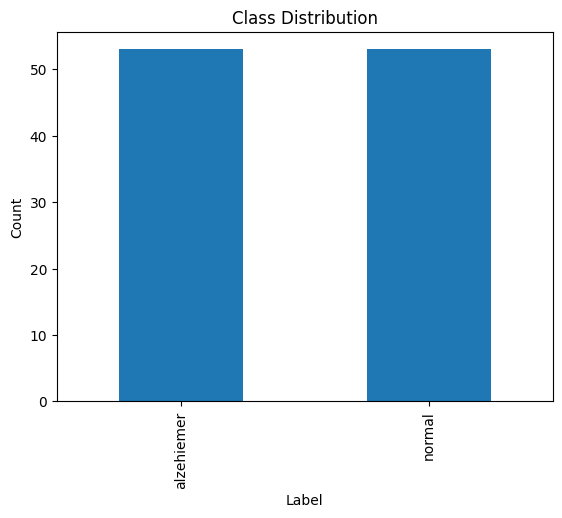

In [6]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Split features and labels

In [7]:
# Exclude 'file' column from features
X = df.drop(['file', 'label'], axis=1)
y = df['label']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training and Evaluation

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6818181818181818

Classification Report:
               precision    recall  f1-score   support

  alzehiemer       0.64      0.82      0.72        11
      normal       0.75      0.55      0.63        11

    accuracy                           0.68        22
   macro avg       0.70      0.68      0.68        22
weighted avg       0.70      0.68      0.68        22


Confusion Matrix:
 [[9 2]
 [5 6]]


Feature Importance

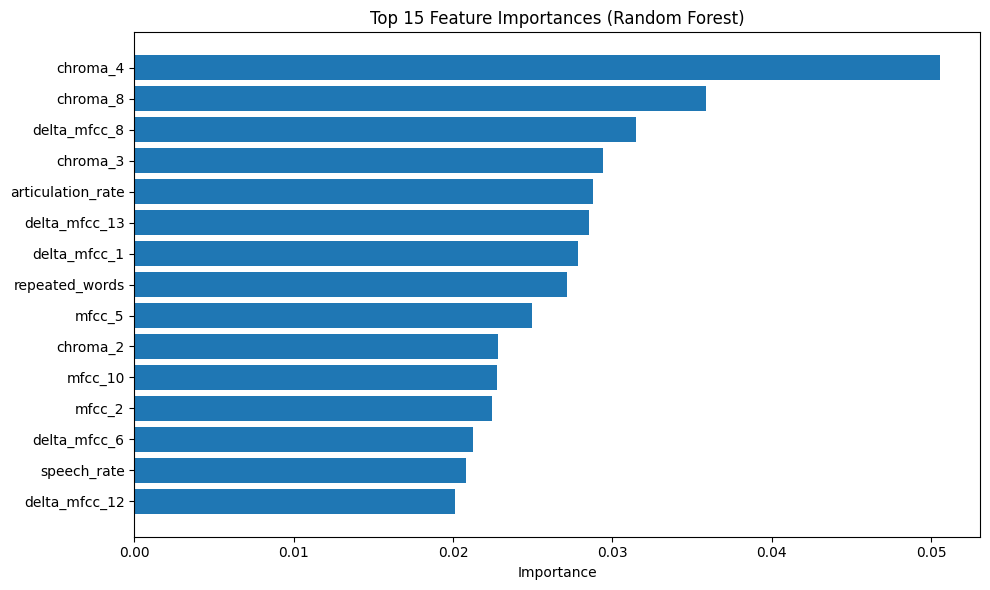

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['feature'][:15][::-1], feat_imp_df['importance'][:15][::-1])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

model with hyperparameter tuning using GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
gs = GridSearchCV(rf, grid, cv=5, scoring='accuracy', n_jobs=-1)
gs.fit(X_train_scaled, y_train)

print("Best parameters:", gs.best_params_)
print("Best cross-validation accuracy:", gs.best_score_)

# Evaluate on test set
y_pred_gs = gs.predict(X_test_scaled)
print("Test set accuracy:", accuracy_score(y_test, y_pred_gs))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gs))

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation accuracy: 0.6301470588235294
Test set accuracy: 0.7727272727272727

Classification Report:
               precision    recall  f1-score   support

  alzehiemer       0.71      0.91      0.80        11
      normal       0.88      0.64      0.74        11

    accuracy                           0.77        22
   macro avg       0.79      0.77      0.77        22
weighted avg       0.79      0.77      0.77        22



Save the model

In [34]:
import joblib

# Save the model to a file
joblib.dump(gs.best_estimator_, '..\models/alzheimers_model.joblib')

['..\\models/alzheimers_model.joblib']

XGBoost

In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
gs_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gs_xgb.fit(X_train_scaled, y_train_encoded)

# Evaluate on test set
y_pred_xgb = gs_xgb.predict(X_test_scaled)
print("Test set accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_xgb, target_names=le.classes_))

Test set accuracy: 0.6818181818181818

Classification Report:
               precision    recall  f1-score   support

  alzehiemer       0.67      0.73      0.70        11
      normal       0.70      0.64      0.67        11

    accuracy                           0.68        22
   macro avg       0.68      0.68      0.68        22
weighted avg       0.68      0.68      0.68        22



PCA

In [20]:
from sklearn.decomposition import PCA

# Reduce to 10 principal components (adjust as needed)
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Retrain XGBoost on PCA features
xgb_pca = XGBClassifier(**gs_xgb.best_params_, eval_metric='logloss', random_state=42)
xgb_pca.fit(X_train_pca, y_train_encoded)
y_pred_pca = xgb_pca.predict(X_test_pca)
print("Test set accuracy with PCA:", accuracy_score(y_test_encoded, y_pred_pca))
print("\nClassification Report (PCA):\n", classification_report(y_test_encoded, y_pred_pca))

Test set accuracy with PCA: 0.5454545454545454

Classification Report (PCA):
               precision    recall  f1-score   support

           0       0.54      0.64      0.58        11
           1       0.56      0.45      0.50        11

    accuracy                           0.55        22
   macro avg       0.55      0.55      0.54        22
weighted avg       0.55      0.55      0.54        22



SVM

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm = SVC(probability=True, random_state=42)
gs_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gs_svm.fit(X_train_scaled, y_train_encoded)

print("Best SVM parameters:", gs_svm.best_params_)
print("Best cross-validation accuracy:", gs_svm.best_score_)

# Evaluate on test set
y_pred_svm = gs_svm.predict(X_test_scaled)
print("Test set accuracy:", accuracy_score(y_test_encoded, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_svm, target_names=le.classes_))

Best SVM parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best cross-validation accuracy: 0.5691176470588235
Test set accuracy: 0.6818181818181818

Classification Report:
               precision    recall  f1-score   support

  alzehiemer       1.00      0.36      0.53        11
      normal       0.61      1.00      0.76        11

    accuracy                           0.68        22
   macro avg       0.81      0.68      0.65        22
weighted avg       0.81      0.68      0.65        22



MLP

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import numpy as np

input_dim = X_train.shape[1]
y_train_encoded = LabelEncoder().fit_transform(y_train)
y_test_encoded = LabelEncoder().fit_transform(y_test)

# Convert labels to float32
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train_encoded = np.array(y_train_encoded, dtype=np.float32)
y_test_encoded = np.array(y_test_encoded, dtype=np.float32)

# Define enhanced MLP model
mlp_model = Sequential()
mlp_model.add(Dense(256, input_dim=input_dim, activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
mlp_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
mlp_model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model
accuracy = mlp_model.evaluate(X_test, y_test_encoded, verbose=0)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/100
3/3 [==============================] - 4s 186ms/step - loss: 0.8544 - accuracy: 0.5595 - val_loss: 5.9874 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 30ms/step - loss: 0.8060 - accuracy: 0.5476 - val_loss: 3.9780 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 32ms/step - loss: 0.7828 - accuracy: 0.4762 - val_loss: 3.1186 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6588 - accuracy: 0.6071 - val_loss: 2.4348 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6955 - accuracy: 0.6071 - val_loss: 1.7955 - val_accuracy: 0.5455
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6619 - accuracy: 0.5952 - val_loss: 1.2569 - val_accuracy: 0.5455
Epoch 7/100
3/3 [==============================] - 0s 42ms/step - loss: 0.5584 - accuracy: 0.7024 - val_loss: 1.0793 - val_accuracy: 0.5909
Epoch 8/100
3/3 [==